In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [19]:
conn = sqlite3.connect('poker.db')

In [38]:
df = pd.read_sql_query('select * from games;', conn)

In [55]:
pots = df[df['post_river_pot'] < 500]
#pots = df[df['post_river_pot'] > 100]


In [40]:
df.describe()

,big_blind,pre_flop_pot,post_flop_pot,post_turn_pot,post_river_pot
count,2594791.0,2.594791e+06,2.594791e+06,2.594791e+06,2.594791e+06
mean,20.0,5.587644e+01,7.599234e+01,1.037373e+02,1.482725e+02
std,0.0,4.674708e+01,7.552180e+01,1.214781e+02,1.370623e+02
min,20.0,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
25%,20.0,3.000000e+01,2.000000e+01,0.000000e+00,5.000000e+01
50%,20.0,4.500000e+01,6.500000e+01,8.500000e+01,1.200000e+02
75%,20.0,7.500000e+01,1.100000e+02,1.600000e+02,2.000000e+02
max,20.0,3.980000e+03,2.330000e+03,8.115000e+03,8.115000e+03


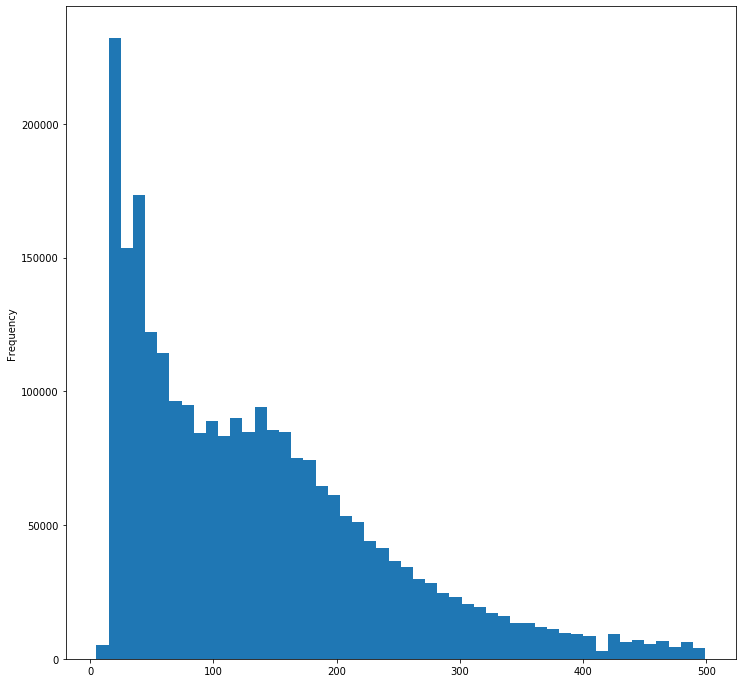

In [57]:
pots = df[df['post_river_pot'] < 500]
pots = pots['post_river_pot']
fig, ax = plt.subplots(figsize=(12,12))


pots.plot.hist(ax=ax, bins=50)


In [59]:
net_gains = pd.read_sql_query('select collects from hands;', conn)

In [60]:
net_gains = net_gains[net_gains['collects'] < 1000]
net_gains = net_gains[net_gains['collects'] > -1000]

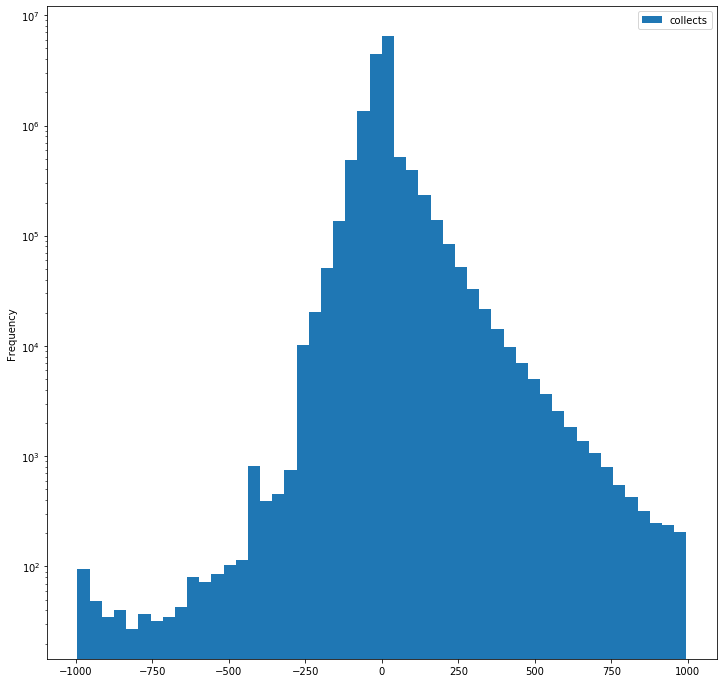

In [64]:
fig, ax = plt.subplots(figsize=(12,12))


net_gains.plot.hist(ax=ax, bins=50)
ax.set_yscale('log')

In [24]:
cards = pd.read_sql_query('select card_1, game_ID from hands where card_1 is not null', conn)
cards = cards.groupby('card_1').count()

DatabaseError: Execution failed on sql 'select card_1, game_ID from hands where card_1 is not null': no such column: card_1

In [17]:
cards.describe()

,game_ID
count,52.000000
mean,52650.230769
std,19266.371905
min,27870.000000
25%,37821.500000
50%,48511.000000
75%,65999.500000
max,95094.000000


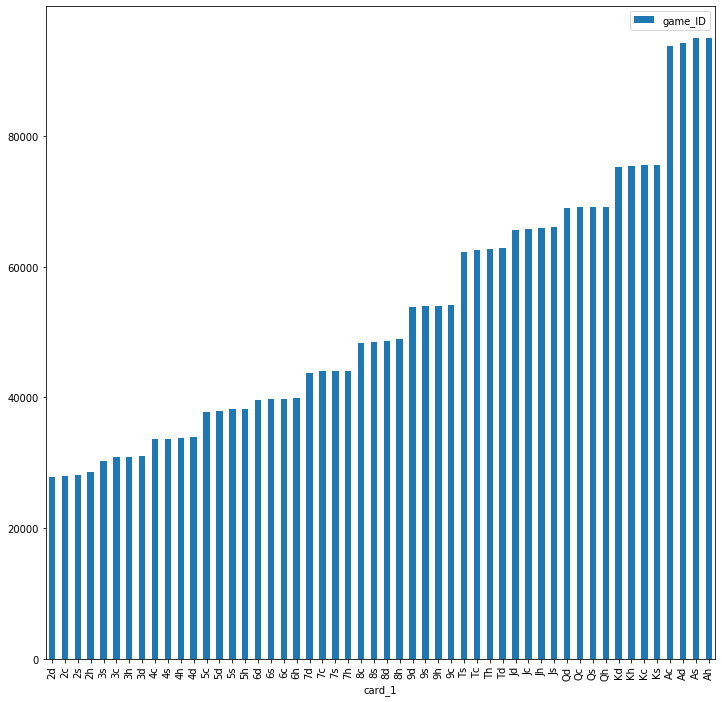

In [16]:
cards = cards.sort_values('game_ID')
fig, ax = plt.subplots(figsize=(12,12))


cards.plot.bar(ax=ax)

In [65]:
games_sample = pd.read_sql_query('select * from Games limit 10;', conn)
hands_sample = pd.read_sql_query('select * from Hands limit 10;', conn)
actions_sample = pd.read_sql_query('select * from Actions limit 10;', conn)

In [76]:
hands_sample.head(10)


,game_ID,player_ID,card1,card2,bets,collects,chips_at_beginning
0,798243437,aaron,None,None,0.0,0.0,1000.0
1,798243508,aaron,None,None,0.0,0.0,1000.0
2,798243633,aaron,None,None,0.0,0.0,1000.0
3,798243712,aaron,None,None,0.0,0.0,1000.0
4,798853347,aaron,None,None,0.0,0.0,1000.0
5,798853485,aaron,None,None,10.0,-10.0,1000.0
6,798853590,aaron,None,None,90.0,190.0,990.0
7,798853714,aaron,None,None,0.0,0.0,1180.0
8,798853782,aaron,8s,As,40.0,-40.0,1180.0
9,798853890,aaron,None,None,0.0,0.0,1140.0
